In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot

In [5]:
data = pd.read_csv('/content/sales_data.csv')

In [6]:
data.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


**Data Cleaning and formating**



In [7]:
data.dtypes

date         object
product      object
category     object
price       float64
quantity    float64
revenue     float64
dtype: object

In [8]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       date  product  category  price  quantity  revenue
0    False    False     False  False     False    False
1    False    False     False  False     False    False
2    False    False     False  False     False    False
3    False    False     False  False     False    False
4    False    False     False  False     False    False
..     ...      ...       ...    ...       ...      ...
364  False    False     False  False     False    False
365  False    False     False  False     False    False
366  False    False     False  False     False    False
367  False    False     False  False     False    False
368  False    False     False  False     False    False

[369 rows x 6 columns]>

**What was the total revenue generated by the company over the course of the year?**

In [12]:
total_revenue = data['revenue'].sum()

In [13]:
print(f'Total revenue generated by the company over the course of the year: ${total_revenue:.2f}')

Total revenue generated by the company over the course of the year: $750430.00


**Which product had the highest revenue? How much revenue did it generate?**

In [14]:
max_revenue_product = data.loc[data['revenue'].idxmax()]

In [15]:
# Extract the product name and revenue
product_with_highest_revenue = max_revenue_product['product']
highest_revenue = max_revenue_product['revenue']

In [16]:
print(f'The product with the highest revenue is "{product_with_highest_revenue}" '
      f'with a revenue of ${highest_revenue:.2f}')

The product with the highest revenue is "Smartphone" with a revenue of $7200.00


In [25]:
product_revenue = data.groupby('product')['revenue'].sum()

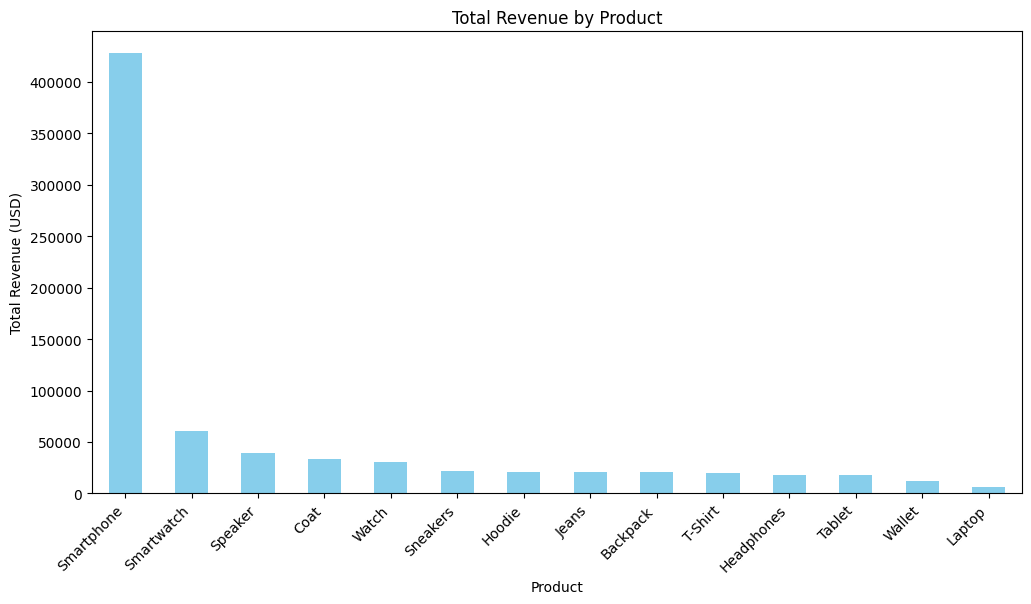

In [26]:
# Visualization
plt.figure(figsize=(12, 6))
product_revenue.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Revenue (USD)')
plt.title('Total Revenue by Product')
plt.xticks(rotation=45, ha='right')
plt.show()

**What was the average price of a product sold by the company?**

In [17]:
average_price = data['price'].mean()

print(f'The average price of a product sold by the company is ${average_price:.2f}')

The average price of a product sold by the company is $211.23


**What was the total quantity of products sold by the company?**

In [18]:
total_quantity = data['quantity'].sum()

print(f'The total quantity of products sold by the company is {total_quantity}')

The total quantity of products sold by the company is 5360.0


**Which category had the highest revenue? How much revenue did it generate?**

In [19]:
category_revenue = data.groupby('category')['revenue'].sum()

max_revenue_category = category_revenue.idxmax()
highest_category_revenue = category_revenue.max()


print(f'The category with the highest revenue is "{max_revenue_category}" '
      f'with a revenue of ${highest_category_revenue:.2f}')

The category with the highest revenue is "Electronics" with a revenue of $509480.00


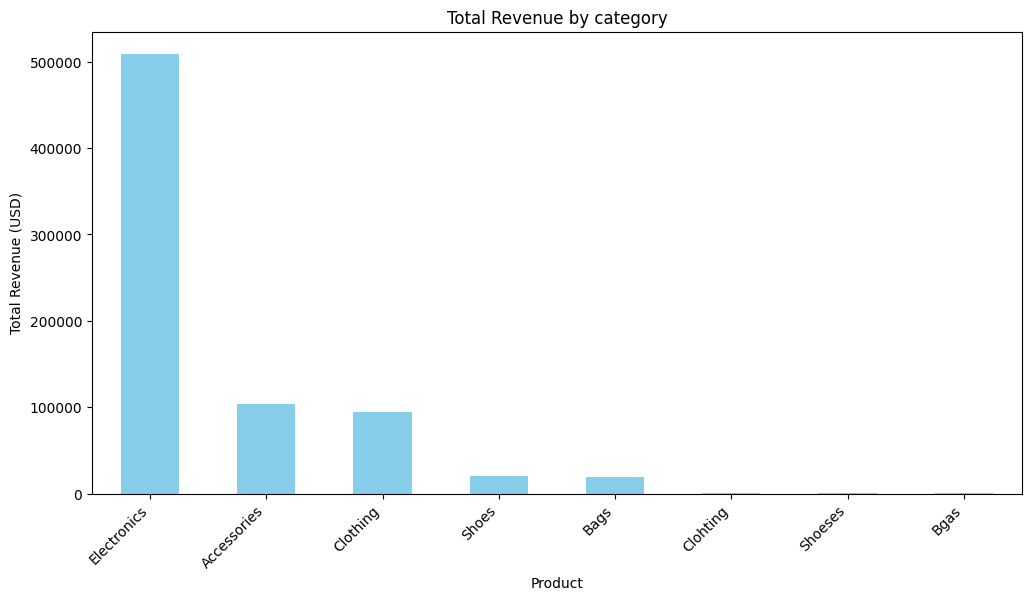

In [28]:
# Visualization
plt.figure(figsize=(12, 6))
category_revenue.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Revenue (USD)')
plt.title('Total Revenue by category')
plt.xticks(rotation=45, ha='right')
plt.show()

**What was the average revenue per sale?**

In [20]:
average_revenue_per_sale = data['revenue'].mean()

print(f'The average revenue per sale is ${average_revenue_per_sale:.2f}')

The average revenue per sale is $2050.36


**What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)**

In [21]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
# Resample the data by quarter and calculate the total revenue for each quarter
quarterly_revenue = data.resample('Q')['revenue'].sum()
for quarter, revenue in quarterly_revenue.items():
    print(f'Total revenue for {quarter}: ${revenue:.2f}')


Total revenue for 2022-03-31 00:00:00: $182100.00
Total revenue for 2022-06-30 00:00:00: $179370.00
Total revenue for 2022-09-30 00:00:00: $195430.00
Total revenue for 2022-12-31 00:00:00: $193530.00
